# Homework 4: Data Visualization
- **Name**:  Subham Gupta
- **UB Username**: subhamgu
- **UB Person Number**:  50538333

---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

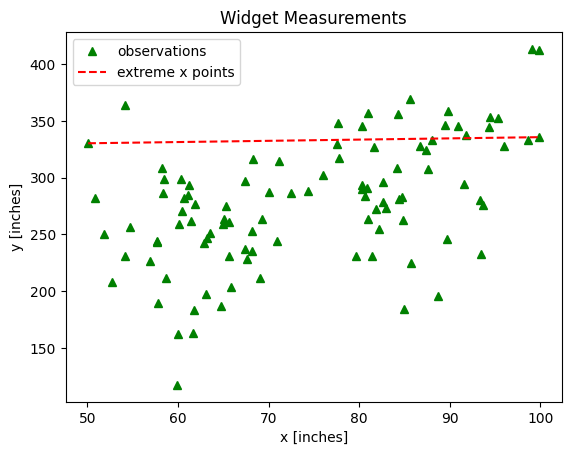

In [1]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
# raed scatter data.csv
df = pd.read_csv('scatter_data.csv')
df.head()
# remove the percent sign (%) if appear in any row or column name, (which denotes a comment)
df.columns = df.columns.str.replace('%', '')
df.columns = df.columns.str.replace(' ', '')
df.head()
# plot the data points as green triangles
plt.plot(df['x'], df['y'], 'g^')

# plot a line from the minimum x-value to the maximum x-value. The line should be dashed and colored red
plt.plot([df['x'].min(), df['x'].max()], [df.loc[df['x'].idxmin(), 'y'], df.loc[df['x'].idxmax(), 'y']], 'r--')

# include a title for your plot
plt.title('Widget Measurements')

# label the x- and y-axes
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# include a legend for your plot
plt.legend(['observations', 'extreme x points'])

In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 2 - Histogram

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import pandas as pd

# Read the data from the CSV file, ignoring lines starting with '%'
df2 = pd.read_csv('student_grades.csv', comment='%', header=None, names=['% studentID', ' avgScore '])

df2.head()


,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


from matplotlib import pyplot as plt
_df_7['% studentID'].plot(kind='hist', bins=20, title='% studentID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[' avgScore '].plot(kind='hist', bins=20, title=' avgScore ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='% studentID', y=' avgScore ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['% studentID']
  ys = series[' avgScore ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('% studentID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('% studentID')
_ = plt.ylabel(' avgScore ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['% studentID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '% studentID'}, axis=1)
              .sort_values('% studentID', ascending=True))
  xs = counted['% studentID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('% studentID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('% studentID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['% studentID'].plot(kind='line', figsize=(8, 4), title='% studentID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[' avgScore '].plot(kind='line', figsize=(8, 4), title=' avgScore ')
plt.gca().spines[['top', 'right']].set_visible(False)

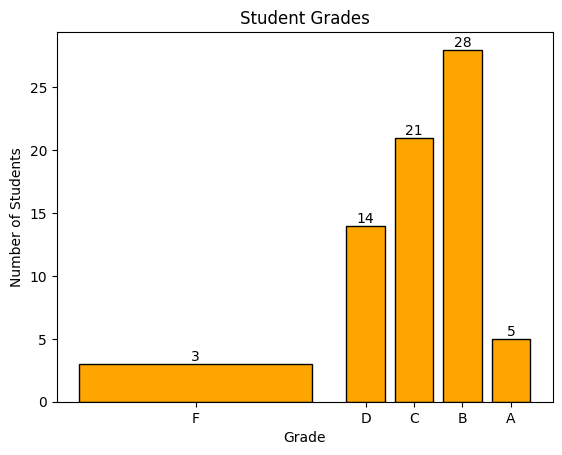

In [ ]:
# Define the bin edges and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

# Create the histogram with specified bins, colors, and outline
plt.hist(df2[' avgScore '], bins=bins, edgecolor='black', color='orange', rwidth=0.8)

# Set x-axis and y-axis labels
plt.xlabel('Grade')
plt.ylabel('Number of Students')

# Set the title of the histogram
plt.title('Student Grades')

# Customize the x-axis labels using the defined labels
#plt.xticks(bins, labels)
plt.xticks([(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)], labels)

# Display counts above each bar
for i in range(len(bins) - 1):
    count = ((df2[' avgScore '] >= bins[i]) & (df2[' avgScore '] < bins[i + 1])).sum()
    plt.text((bins[i] + bins[i + 1]) / 2, count, str(count), ha='center', va='bottom')

# Show the histogram
plt.show()



### Problem 3 - Barplot and Boxplot in the Same Figure

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import seaborn as sns

# Reading the data from the CSV file, ignoring rows that begin with '%'
df3 = pd.read_csv('solution_data.csv')
df3.columns = df3.columns.str.replace('%', '')
df3.columns = df3.columns.str.replace(' ', '')
df3.head()

,Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [ ]:
df3['SolnMethod'] = df3['SolnMethod'].str.strip('|')
df3.head()

,Problem,SolnMethod,Value,OptimalOFV,optimality_gap
0,0,genetic algorithm,112.749860,166.170172,32.147955
1,0,simulated annealing,75.220917,166.170172,54.732600
2,0,tabu search,111.574225,166.170172,32.855444
3,0,optimal,166.170172,166.170172,0.000000
4,1,genetic algorithm,31.819762,48.634470,34.573643


In [ ]:
df3['OptimalOFV'] = df3.groupby('Problem')['Value'].transform(lambda x: x.loc[df3['SolnMethod'] == 'optimal'].iloc[0])
df3.head()


,Problem,SolnMethod,Value,OptimalOFV
0,0,genetic algorithm,112.749860,166.170172
1,0,simulated annealing,75.220917,166.170172
2,0,tabu search,111.574225,166.170172
3,0,optimal,166.170172,166.170172
4,1,genetic algorithm,31.819762,48.634470


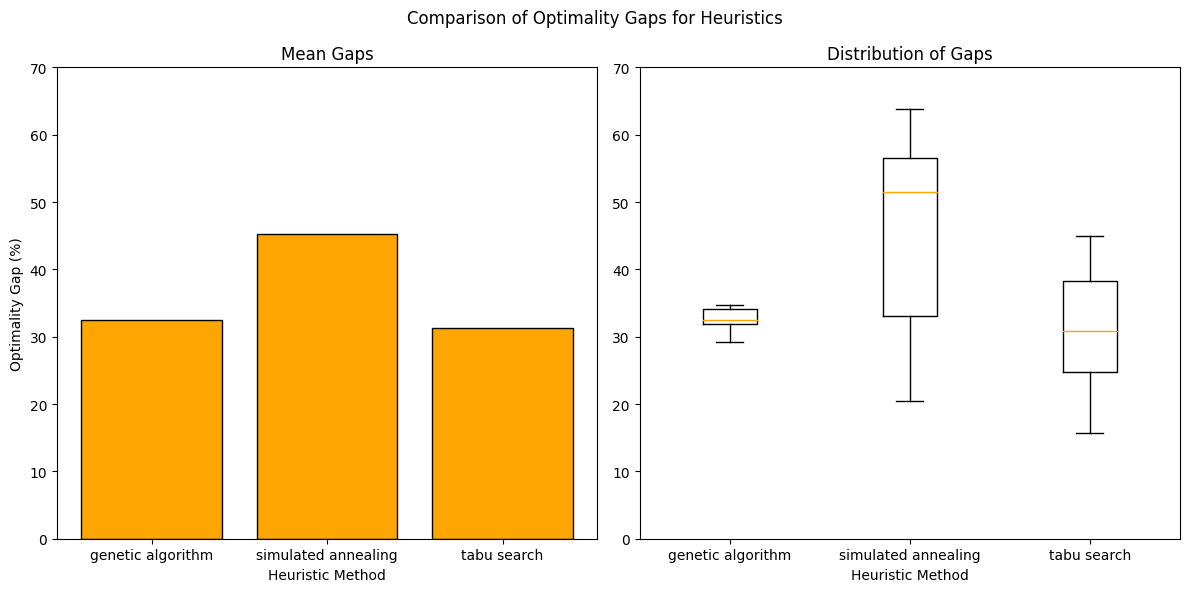

In [ ]:
# calculate the optimality gap for each heuristic
df3['optimality_gap'] = (df3['OptimalOFV'] - df3['Value']) / df3['OptimalOFV'] * 100
# Filter data for specified heuristics
filtered_df = df3[df3['SolnMethod'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
# Create the figure and the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first subplot (bar plot)
axs[0].bar(filtered_df['SolnMethod'].unique(), filtered_df.groupby('SolnMethod')['optimality_gap'].mean(), color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Plot for the second subplot (box plot)
axs[1].boxplot([filtered_df[filtered_df['SolnMethod'] == method]['optimality_gap'] for method in filtered_df['SolnMethod'].unique()],
               labels=filtered_df['SolnMethod'].unique(), medianprops=dict(color='orange'))
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Set the same y-axis scale for both subplots
ylim = axs[1].get_ylim()
axs[0].set_ylim(ylim)

# Adjust layout
plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()


---
## Part 2 - Explore New Plot Types

This codes will generate a horizontal bar chart showing the number of FIFA World Cup wins for each country from 1930 to 2014. Where X coordinate represents Number of win and Y coordinates represents name of the Country. So, Brazil has won most number of time as we can see from the plot.

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/abecklas/fifa-world-cup/

In [2]:
# Use "Code" cells to create your plots
# ...
import matplotlib.pyplot as plt
import numpy as np


# Reading the data from the CSV file, ignoring rows that begin with '%'
df4 = pd.read_csv('WorldCups.csv')
df4.columns = df4.columns.str.replace('%', '')
df4.columns = df4.columns.str.replace(' ', '')
df4.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


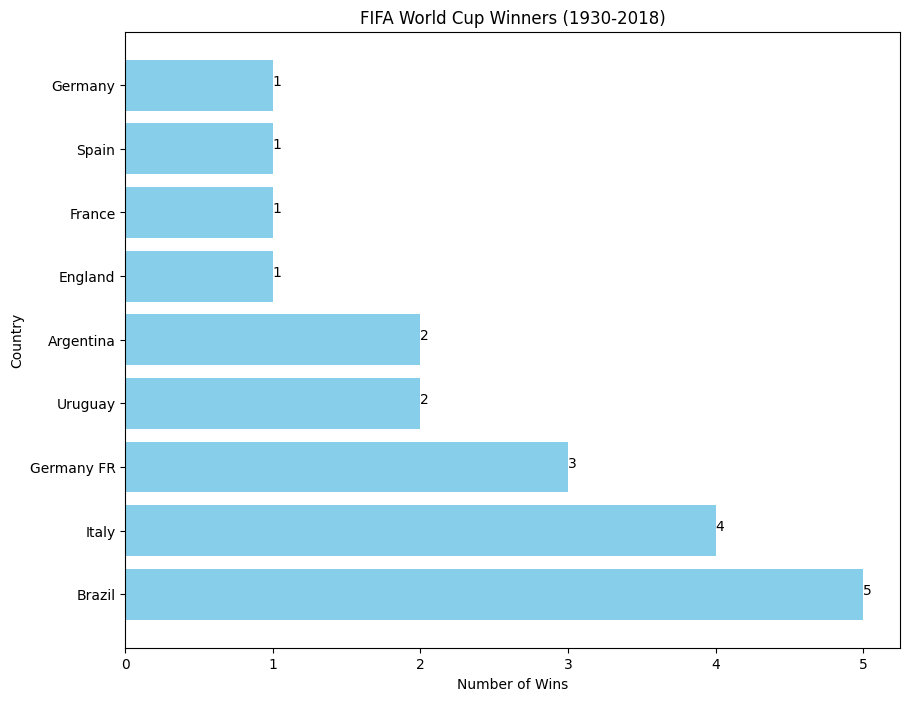

In [3]:
# It's OK to break up your code into multiple cells.
winners = df4['Winner'].value_counts().reset_index()
winners.columns = ['Country', 'Wins']
winners = winners.sort_values(by='Wins', ascending=False)

plt.figure(figsize=(10, 8))

# Create the horizontal bar chart
plt.barh(winners['Country'], winners['Wins'], color='skyblue')

# Add labels for each bar
for index, value in enumerate(winners['Wins']):
    plt.text(value, index, str(value))

# Set the labels and title
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.title('FIFA World Cup Winners (1930-2018)')

plt.show()



In [ ]:
# It's also OK to include comments,
# either in Markdown or as Python code comments.

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.]